<a href="https://colab.research.google.com/github/sepandms/SkinCare/blob/main/CNN_280x210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')
G_path = '/content/drive/MyDrive/DataSources/SkinCare'
!pip install pickle5

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 7.4 MB/s 


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset as dset
#import torchvision.transforms.Compose
import numpy as np
from datetime import datetime	
import random
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import random_split
from torch.utils.data import SubsetRandomSampler
from torch.utils.data import WeightedRandomSampler
from torch.utils.data import DataLoader
import time
from tqdm import tqdm
import pickle as pickle
from statistics import mean
import pandas as pd
pd.options.display.max_colwidth = 250
import sklearn as sk
from sklearn.model_selection import train_test_split
device = torch.device("cuda" if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else "cpu")
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

In [5]:
Binary_classification = True
file = 'DataSet_280x210' 
input_data , labels = pickle.load(open(G_path + '/DataSet_280x210/'+ file,'rb'))
file = 'Evaluation_set_280x210' 
Evaluation_set = pickle.load(open(G_path + '/DataSet_280x210/' + file,'rb'))

if Binary_classification:
  labels = labels[1]
else:
  labels = labels[0]

In [6]:
labels[1][:10]

tensor([0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

# **CNN Networks**

In [7]:
class CNN_Nets:
  class Net8(nn.Module):
    def __init__(self,drop_out):
        super().__init__()
        self.conv1 = nn.Conv2d( in_channels=3 , out_channels=64, stride = 2 , kernel_size=(3, 3))
        self.pool1 = nn.MaxPool2d( kernel_size = (3,3), stride = 2, padding = 0 )
        self.conv2 = nn.Conv2d( in_channels=64, out_channels=128, stride = 2 , kernel_size=(3, 3))
        self.pool2 = nn.MaxPool2d( kernel_size = (3,3), stride = 2, padding = 0 )
        self.conv3 = nn.Conv2d( in_channels=128, out_channels=64, stride = 2 , kernel_size=(3, 3))
        self.pool3 = nn.MaxPool2d( kernel_size = (3,3), stride = 2, padding = 0 )
        self.fc1   = nn.Linear(in_features= 384 , out_features = 128)
        self.fc2   = nn.Linear(in_features= 128 , out_features = 7)
        self.Act   = nn.LeakyReLU(inplace=True)
        self.dropout = nn.Dropout(drop_out)
    def forward(self, x):
        out = self.Act(self.conv1(x))
        out = self.Act(self.pool1(out))
        out = self.dropout(out)
        out = self.Act(self.conv2(out))
        out = self.Act(self.pool2(out))
        out = self.dropout(out)
        out = self.Act(self.conv3(out))
        out = self.Act(self.pool3(out))
        out = self.dropout(out)
        out = torch.flatten(out, 1) 
        out = self.Act(self.fc1(out))
        out = self.fc2(out)
        return out
    def forward_noDrop(self, x):
        out = self.Act(self.conv1(x))
        out = self.Act(self.pool1(out))
        out = self.Act(self.conv2(out))
        out = self.Act(self.pool2(out))
        out = self.Act(self.conv3(out))
        out = self.Act(self.pool3(out))
        out = torch.flatten(out, 1) 
        out = self.Act(self.fc1(out))
        out = self.fc2(out)
        return out

  class Net8_a(nn.Module):
    def __init__(self,drop_out):
        super().__init__()
        self.conv1 = nn.Conv2d( in_channels=3 , out_channels=64, stride = 2 , kernel_size=(3, 3))
        self.pool1 = nn.MaxPool2d( kernel_size = (3,3), stride = 2, padding = 0 )
        self.conv2 = nn.Conv2d( in_channels=64, out_channels=128, stride = 2 , kernel_size=(3, 3))
        self.pool2 = nn.MaxPool2d( kernel_size = (3,3), stride = 2, padding = 0 )
        self.conv3 = nn.Conv2d( in_channels=128, out_channels=256, stride = 2 , kernel_size=(3, 3))
        self.pool3 = nn.MaxPool2d( kernel_size = (3,3), stride = 2, padding = 0 )
        self.fc1   = nn.Linear(in_features= 1536 , out_features = 128)
        self.fc2   = nn.Linear(in_features= 128 , out_features = 7)
        self.Act   = nn.LeakyReLU()
        self.dropout = nn.Dropout(drop_out)
    def forward(self, x):
        out = self.Act(self.conv1(x))
        out = self.pool1(out)
        out = self.dropout(out)
        out = self.Act(self.conv2(out))
        out = self.pool2(out)
        out = self.dropout(out)
        out = self.Act(self.conv3(out))
        out = self.pool3(out)
        out = self.dropout(out)
        out = torch.flatten(out, 1) 
        out = self.Act(self.fc1(out))
        out = self.fc2(out)
        return out
    def forward_noDrop(self, x):
        out = self.Act(self.conv1(x))
        out = self.pool1(out)
        out = self.Act(self.conv2(out))
        out = self.pool2(out)
        out = self.Act(self.conv3(out))
        out = self.pool3(out)
        out = torch.flatten(out, 1) 
        out = self.Act(self.fc1(out))
        out = self.fc2(out)
        return out
  
  class Net8_b(nn.Module):
    def __init__(self,drop_out):
        super().__init__()
        self.conv1 = nn.Conv2d( in_channels=3 , out_channels=64, stride = 2 , kernel_size=(3, 3))
        self.pool1 = nn.MaxPool2d( kernel_size = (3,3), stride = 2, padding = 0 )
        self.conv2 = nn.Conv2d( in_channels=64, out_channels=128, stride = 2 , kernel_size=(3, 3))
        self.pool2 = nn.MaxPool2d( kernel_size = (3,3), stride = 2, padding = 0 )
        self.conv3 = nn.Conv2d( in_channels=128, out_channels=256, stride = 2 , kernel_size=(3, 3))
        self.pool3 = nn.MaxPool2d( kernel_size = (3,3), stride = 2, padding = 0 )
        self.fc1   = nn.Linear(in_features= 1536 , out_features = 128)
        self.fc2   = nn.Linear(in_features= 128 , out_features = 7)
        self.Act   = nn.LeakyReLU(inplace=True)
        self.dropout = nn.Dropout(drop_out)
    def forward(self, x):
        out = self.Act(self.conv1(x))
        out = self.Act(self.pool1(out))
        out = self.dropout(out)
        out = self.Act(self.conv2(out))
        out = self.Act(self.pool2(out))
        out = self.dropout(out)
        out = self.Act(self.conv3(out))
        out = self.Act(self.pool3(out))
        out = self.dropout(out)
        out = torch.flatten(out, 1) 
        out = self.Act(self.fc1(out))
        out = self.fc2(out)
        return out
    def forward_noDrop(self, x):
        out = self.Act(self.conv1(x))
        out = self.Act(self.pool1(out))
        out = self.Act(self.conv2(out))
        out = self.Act(self.pool2(out))
        out = self.Act(self.conv3(out))
        out = self.Act(self.pool3(out))
        out = torch.flatten(out, 1) 
        out = self.Act(self.fc1(out))
        out = self.fc2(out)
        return out


  class Net8_b_binary(nn.Module):
    def __init__(self,drop_out):
        super().__init__()
        self.conv1 = nn.Conv2d( in_channels=3 , out_channels=64, stride = 2 , kernel_size=(3, 3))
        self.pool1 = nn.MaxPool2d( kernel_size = (3,3), stride = 2, padding = 0 )
        self.conv2 = nn.Conv2d( in_channels=64, out_channels=128, stride = 2 , kernel_size=(3, 3))
        self.pool2 = nn.MaxPool2d( kernel_size = (3,3), stride = 2, padding = 0 )
        self.conv3 = nn.Conv2d( in_channels=128, out_channels=256, stride = 2 , kernel_size=(3, 3))
        self.pool3 = nn.MaxPool2d( kernel_size = (3,3), stride = 2, padding = 0 )
        self.fc1   = nn.Linear(in_features= 1536 , out_features = 128)
        self.fc2   = nn.Linear(in_features= 128 , out_features = 2)
        self.Act   = nn.LeakyReLU(inplace=True)
        self.dropout = nn.Dropout(drop_out)
    def forward(self, x):
        out = self.Act(self.conv1(x))
        out = self.Act(self.pool1(out))
        out = self.dropout(out)
        out = self.Act(self.conv2(out))
        out = self.Act(self.pool2(out))
        out = self.dropout(out)
        out = self.Act(self.conv3(out))
        out = self.Act(self.pool3(out))
        out = self.dropout(out)
        out = torch.flatten(out, 1) 
        out = self.Act(self.fc1(out))
        out = self.fc2(out)
        return out
    def forward_noDrop(self, x):
        out = self.Act(self.conv1(x))
        out = self.Act(self.pool1(out))
        out = self.Act(self.conv2(out))
        out = self.Act(self.pool2(out))
        out = self.Act(self.conv3(out))
        out = self.Act(self.pool3(out))
        out = torch.flatten(out, 1) 
        out = self.Act(self.fc1(out))
        out = self.fc2(out)
        return out

# **Test Nets**

In [6]:
model_test = CNN_Nets.Net8_a(drop_out=0.1)
X_ = input_data[0][0:5]
out = model_test(X_)
out.shape

torch.Size([5, 7])

# **Confusion-Matrix & Accuracy**

In [8]:
def confusion_matrix(Y,Y_pred):
    CM = sk.metrics.confusion_matrix(Y,Y_pred)
    print('Nr. of Data : \n', CM.sum())
    print('Accuracy of The Model : \n', np.diag(CM).sum()/CM.sum())
    sk.metrics.ConfusionMatrixDisplay(CM).plot()
    FP = CM.sum(axis=0) - np.diag(CM) 
    FN = CM.sum(axis=1) - np.diag(CM)
    TP = np.diag(CM)
    TN = CM.sum() - (FP + FN + TP)
    weights = CM.sum(axis=1) / CM.sum() 
    ACC = np.nan_to_num((TP+TN)/(TP+FP+FN+TN) , nan=0)
    Recall_Sensitivity = np.nan_to_num(TP/(TP+FN) , nan=0)
    Specificity = np.nan_to_num(TN/(TN+FP) , nan=0)
    Precision = np.nan_to_num(TP/(TP+FP) , nan=0)
    f1_score = np.nan_to_num( 2*Precision*Recall_Sensitivity / (Recall_Sensitivity + Precision), nan=0)
    Performance_DF = pd.concat([pd.DataFrame(CM),pd.DataFrame(weights, columns=['weights']),pd.DataFrame(Precision, columns=['Precision']),pd.DataFrame(Recall_Sensitivity,columns=['Recall_Sensitivity'])
        ,pd.DataFrame(Specificity, columns=['Specificity']),pd.DataFrame(f1_score, columns=['f1_score'])], axis=1)
    total_row1 = pd.Series({'Precision':mean(Precision),'Recall_Sensitivity':mean(Recall_Sensitivity),'Specificity':mean(Specificity),'f1_score':mean(f1_score)}, name='Simple Avg.')
    total_row2 = pd.Series({'Precision':sum(weights*Precision),'Recall_Sensitivity':sum(weights*Recall_Sensitivity),'Specificity':sum(weights*Specificity),'f1_score':sum(weights*f1_score)}, name='Weighted Avg.')
    Performance_DF = Performance_DF.append([total_row1,total_row2])
    cols = ['weights','Precision','Recall_Sensitivity','Specificity','f1_score']
    per_details = Performance_DF[cols].style.format({'weights': "{:.1%}",'Precision': "{:.1%}",'Recall_Sensitivity': "{:.1%}",'Specificity': "{:.1%}",'f1_score': "{:.1%}"})
    return per_details

def recall_specificity(Y,Y_pred, type):
    CM = sk.metrics.confusion_matrix(Y,Y_pred)
    FP = CM.sum(axis=0) - np.diag(CM) 
    FN = CM.sum(axis=1) - np.diag(CM)
    TP = np.diag(CM)
    TN = CM.sum() - (FP + FN + TP)
    weights = CM.sum(axis=1) / CM.sum() 
    ACC = np.nan_to_num((TP+TN)/(TP+FP+FN+TN) , nan=0)
    Recall_Sensitivity = np.nan_to_num(TP/(TP+FN) , nan=0)
    Specificity = np.nan_to_num(TN/(TN+FP) , nan=0)
    Precision = np.nan_to_num(TP/(TP+FP) , nan=0)
    f1_score = np.nan_to_num( 2*Precision*Recall_Sensitivity / (Recall_Sensitivity + Precision), nan=0)
    Performance_DF = pd.concat([pd.DataFrame(CM),pd.DataFrame(weights, columns=['weights']),pd.DataFrame(Precision, columns=['Precision']),pd.DataFrame(Recall_Sensitivity,columns=['Recall_Sensitivity'])
        ,pd.DataFrame(Specificity, columns=['Specificity']),pd.DataFrame(f1_score, columns=['f1_score'])], axis=1)
    total_row1 = pd.Series({'Precision':mean(Precision),'Recall_Sensitivity':mean(Recall_Sensitivity),'Specificity':mean(Specificity),'f1_score':mean(f1_score)}, name='Simple Avg.')
    total_row2 = pd.Series({'Precision':sum(weights*Precision),'Recall_Sensitivity':sum(weights*Recall_Sensitivity),'Specificity':sum(weights*Specificity),'f1_score':sum(weights*f1_score)}, name='Weighted Avg.')
    Performance_DF = Performance_DF.append([total_row1,total_row2])
    cols = ['weights','Precision','Recall_Sensitivity','Specificity','f1_score']
    return per_details

# def plot_loss_accuracy(model_):
#     epochs_X = [i for i in range(1, model_.epochs+1)]
#     plt.subplots(figsize=(6,4))
#     plt.plot(epochs_X , model_.Epochs_Train_loss, 'bo-', label='Train loss')
#     plt.plot(epochs_X , model_.Epochs_Val_loss,'ro-', label='Validation loss')
#     plt.plot(epochs_X , model_.Epochs_test_loss,'go-', label='Test loss')
#     plt.xlabel("Epochs", fontsize = 12)
#     plt.ylabel("Loss", fontsize = 12)
#     plt.grid()
#     plt.legend()
#     plt.title('Train and Validation loss by epochs')
#     plt.show()
#     plt.plot(epochs_X , model_.Epochs_Train_Acc, 'bo-', label='Train Accuracy')
#     plt.plot(epochs_X , model_.Epochs_Val_Acc,'ro-', label='Validation Accuracy')
#     plt.plot(epochs_X , model_.Epochs_test_Acc,'go-', label='Test Accuracy')
#     plt.xlabel("Epochs", fontsize = 12)
#     plt.ylabel("Accuracy", fontsize = 12)
#     plt.grid()
#     plt.legend()
#     plt.title('Train and Validation Accuracy by epochs')
#     plt.show()

def plot_loss_accuracy(model_):
    epochs_X = [i for i in range(1, len(model_.Epochs_Train_loss)+1)]
    fig, axs = plt.subplots(1,2,figsize=(14,4))
    axs[0].plot(epochs_X , model_.Epochs_Train_loss , 'bo-', label='Train loss')
    axs[0].plot(epochs_X , model_.Epochs_Val_loss,'ro-', label='Validation loss')
    axs[0].plot(epochs_X , model_.Epochs_test_loss,'go-', label='Test loss')
    axs[0].set_xlabel("Epochs", fontsize = 12)
    axs[0].set_ylabel("Loss", fontsize = 12)
    axs[0].grid()
    axs[0].legend()
    axs[0].set_title('Train and Validation loss by epochs', fontsize = 14)
    axs[1].plot(epochs_X , model_.Epochs_Train_Acc , 'bo-', label='Train Accuracy')
    axs[1].plot(epochs_X , model_.Epochs_Val_Acc ,'ro-', label='Validation Accuracy')
    axs[1].plot(epochs_X , model_.Epochs_test_Acc ,'go-', label='Test Accuracy')
    axs[1].set_xlabel("Epochs", fontsize = 12)
    axs[1].set_ylabel("Accuracy", fontsize = 12)
    axs[1].grid()
    axs[1].legend()
    axs[1].set_title('Train and Validation Accuracy by epochs', fontsize = 14)
    plt.show()

def recall_specificity_precision(Y,Y_pred, weighted_avg):
    CM = sk.metrics.confusion_matrix(Y,Y_pred)
    FP = CM.sum(axis=0) - np.diag(CM) 
    FN = CM.sum(axis=1) - np.diag(CM)
    TP = np.diag(CM)
    TN = CM.sum() - (FP + FN + TP)
    weights = CM.sum(axis=1) / CM.sum() 
    Accuracy = np.nan_to_num((TP+TN)/(TP+FP+FN+TN) , nan=0)
    Recall = np.nan_to_num(TP/(TP+FN) , nan=0)
    Specificity = np.nan_to_num(TN/(TN+FP) , nan=0)
    Precision = np.nan_to_num(TP/(TP+FP) , nan=0)
    if weighted_avg:
        return round(sum(weights*Recall),3), round(sum(weights*Specificity),3), round(sum(weights*Precision),3)
    else:
        return round(mean(Recall),3), round(mean(Specificity),3), round(mean(Precision),3)

### **1.3 Training**

In [9]:
class Model_Training_with_loader:

    def __init__(self, Net, Drop, LR, batch_size , Momentum, epochs,patience, weight_decay, loss_func, opt_func,w_sampler, trainDataset, validDataset, X_test,Y_test, print_epochs,hyper_params):    
        
        self.model = Net(Drop).to(device)
        if opt_func is torch.optim.Adam:
            self.opt = opt_func(self.model.parameters(), lr=LR, weight_decay=weight_decay)
        else:
            self.opt = opt_func(self.model.parameters(), lr=LR,momentum=Momentum, weight_decay=weight_decay)

        self.loss_func = loss_func()
        self.epochs = epochs
        self.patience = patience
        self.print_epochs = print_epochs
        self.batch_size = batch_size
        self.Epochs_Train_loss = []
        self.Epochs_Train_Acc = []
        self.Epochs_Val_loss = []
        self.Epochs_Val_Acc = []
        self.Epochs_test_loss = []
        self.Epochs_test_Acc = []
        self.hyper_params = hyper_params
        self.Y_test = Y_test
        self.X_test = X_test
        self.train_loader = DataLoader(dataset = trainDataset , sampler = w_sampler, batch_size = self.batch_size, num_workers=4)
        self.valid_loader = DataLoader(dataset = validDataset , shuffle=True, batch_size = self.batch_size, num_workers=2)
        self.test_loader = DataLoader(dataset = testDataset , shuffle=True, batch_size = self.batch_size, num_workers=2)

    def train(self):
        
        model = self.model
        loss_fn = self.loss_func
        opt = self.opt 
        batch_size = self.batch_size
        min_loss = 100
        iters = 0

        for epoch in range(1, self.epochs+1 ):
            start_time=time.time()
            steps_train_loss = []
            steps_train_Acc = []
            steps_val_loss = []
            steps_val_Acc = []
            steps_test_loss = []
            steps_test_Acc = []
            torch.cuda.empty_cache()
            for batch, (X, Y) in enumerate(self.train_loader):
                X = X.to(device)
                Y = Y.to(device)
                opt.zero_grad()
                model.train()
                y_pred = model.forward(X)
                loss = loss_fn(y_pred, Y)
                loss.backward()
                opt.step()
                y_pred = y_pred.argmax(axis=1)
                nr_of_corrects = (y_pred == Y).sum().item()
                step_acc = nr_of_corrects / batch_size
                steps_train_Acc.append(step_acc)
                steps_train_loss.append(loss.item())
                
                # if (i+1) % 200 == 0:    # print every 2000 mini-batches
                #     print('[Epoch: {}, Nr. Batch: {}]  , Train-Steps-loss: {:.1f} , running_acc: {:.1%}'.format(epoch , i+1 , train_steps_loss , batch_nr_correct / train_nr_total))
                #     self.train_steps_acc = []
                #     train_steps_loss = 0

              #validation loss calculation
            
            for batch, (X, Y) in enumerate(self.valid_loader):
                X = X.to(device)
                Y = Y.to(device)
                model.eval()
                Y_pred = model(X)
                loss_ = loss_fn(Y_pred, Y)
                epoch_loss = loss_.item()
                Y_pred = Y_pred.argmax(axis=1)
                nr_correct = (Y_pred == Y).sum().item()
                step_acc = nr_correct / batch_size
                steps_val_Acc.append(step_acc)
                steps_val_loss.append(epoch_loss)
                
            #Test Set Performance
            for batch, (X, Y) in enumerate(self.test_loader):
                X = X.to(device)
                Y = Y.to(device)
                model.eval()
                Y_pred = model(X)
                loss_ = loss_fn(Y_pred, Y)
                epoch_loss = loss_.item()
                Y_pred = Y_pred.argmax(axis=1)
                nr_correct = (Y_pred == Y).sum().item()
                step_acc = nr_correct / batch_size
                steps_test_Acc.append(step_acc)
                steps_test_loss.append(epoch_loss)

            # Epoch Performance Metrics
            train_epoch_loss = mean(steps_train_loss)
            train_epoch_Acc = mean(steps_train_Acc)
            self.Epochs_Train_loss.append(train_epoch_loss)
            self.Epochs_Train_Acc.append(train_epoch_Acc)   
            val_epoch_loss = mean(steps_val_loss)
            val_epoch_Acc = mean(steps_val_Acc)
            self.Epochs_Val_loss.append(val_epoch_loss)
            self.Epochs_Val_Acc.append(val_epoch_Acc)
            test_epoch_loss = mean(steps_test_loss)
            test_epoch_Acc = mean(steps_test_Acc)           
            self.Epochs_test_loss.append(test_epoch_loss)
            self.Epochs_test_Acc.append(test_epoch_Acc)
            End_time = time.time() 

            if val_epoch_loss < min_loss:
              min_loss = val_epoch_loss
              pickle.dump(model,open('Best_Model','wb'))
              iters = 0
            else:
              iters +=1
     
            if iters > self.patience:
              model = pickle.load(open('Best_Model','rb'))
              print(f'Earlt Stoppo happen at Epoche {epoch} after no improvment of {iters} epochs ')
              break

            if self.print_epochs:
                print(f'[Epoch: {epoch}]  , Train_loss: {train_epoch_loss:.1f} , Train_Acc: {train_epoch_Acc:.1%}, Val_loss: {val_epoch_loss:.1f} , Val_Acc: {val_epoch_Acc:.1%}, Test_Acc: {test_epoch_Acc:.1%}  , run time: {np.round(End_time - start_time, 2)}')
        # print('Finished Training')

# **Define Training data**

In [10]:
labels[0].shape , labels[2].shape

(torch.Size([3833]), torch.Size([407]))

In [15]:
X_train = input_data[0]
Y_train = labels[0]
X_valid = input_data[1]
Y_valid = labels[1]
X_test = input_data[2]
Y_test = labels[2]


label_freq = np.bincount(Y_train)
labels_weights = 1. / label_freq
weights = labels_weights[Y_train]
w_sampler = WeightedRandomSampler(weights, len(weights))

trainDataset = dset(X_train, Y_train)
validDataset = dset(X_valid, Y_valid)
testDataset = dset(X_test, Y_test)

# **Model by Grid**

In [10]:
# Net = [CNN_Nets.Net3,CNN_Nets.Net7,CNN_Nets.Net8]
# LR = [ 1e-3,1e-4]
# batch_size = [24,48]
# Momentum = [0.7,0.8,0.9]
# epochs = [50]
# weight_decay = [0,1e-3,1e-7]
# loss_func  =  [nn.CrossEntropyLoss]
# opt_func = [torch.optim.SGD]

Net = [CNN_Nets.Net8_b]
Drop = [0.2]
LR = [ 1.1e-3]
batch_size = [24]
Momentum = [0.77]
epochs = [100]
patience = [20]
weight_decay = [1e-3]
loss_func  =  [nn.CrossEntropyLoss]
opt_func = [torch.optim.SGD]

# LR_Schedular = torch.optim.reducelr


# Net = [CNN_Nets.Net8_b]
# Drop = [0.2]
# LR = [ 1.1e-3,1.3e-3]
# batch_size = [24]
# Momentum = [0.77,0.74]
# epochs = [100]
# patience = [20]
# weight_decay = [0.8e-3]
# loss_func  =  [nn.CrossEntropyLoss]
# opt_func = [torch.optim.SGD]


grid = {
    'Net' : Net
    ,'Drop' : Drop
    ,'LR' : LR
    ,'batch_size' : batch_size
    ,'Momentum' : Momentum
    ,'epochs' : epochs
    ,'patience': patience
    ,'weight_decay' :weight_decay
    ,'loss_func'  :loss_func
    ,'opt_func' : opt_func
}
params = sk.model_selection.ParameterGrid(grid)

In [11]:
print_epochs = False
export_csv = True
save_models = True
export_name = 'CNN_280x210_MultiClass' # {'280_210_','AutoEncoder_'}

Hyper_Details = pd.DataFrame(columns=['model_name','hyper_param','test_overall_metric','test_recall','blc_test_recall','valid_recall','train_accuracy','valid_accuracy','test_accuracy','train_epoch_loss','train_epoch_acc','valid_epoch_loss','valid_epoch_acc','test_epoch_acc','test_epoch_loss'])
date_hour = datetime.now().strftime("%d_%b%y_%H-%M") 
Max_train_Acc = 0  
Max_valid_Acc = 0 
Max_test_Acc = 0                  
Max_test_Recall = 0
Max_BLC_Test_Recall = 0
Max_test_overall_metric = 0
i = -1
pbar = tqdm(params)
for p in pbar:
    i += 1
    model_name =  export_name + 'Model' + str(i) + '_' + date_hour
    torch.cuda.empty_cache()
    Model_ = Model_Training_with_loader(**p,w_sampler = w_sampler , trainDataset = trainDataset, validDataset = validDataset , X_test = X_test, Y_test = Y_test, print_epochs =print_epochs,hyper_params=p)
    np.random.seed(0)
    random.seed(0)
    torch.manual_seed(0)
    Model_.train()

    train_accuracy = max(Model_.Epochs_Train_Acc)
    # valid_accuracy = max(Model_.Epochs_Val_Acc)
    # test_accuracy = max(Model_.Epochs_test_Acc)
    train_epoch_loss = Model_.Epochs_Train_loss
    train_epoch_acc = Model_.Epochs_Train_Acc
    valid_epoch_loss = Model_.Epochs_Val_loss
    valid_epoch_acc = Model_.Epochs_Val_Acc
    test_epoch_loss = Model_.Epochs_test_loss
    test_epoch_acc = Model_.Epochs_test_Acc


    model_ = Model_.model.eval().to('cpu')
    # test Avg. Sensitivity
    X = input_data[2]
    Y = labels[2]
    Y_pred = model_.forward_noDrop(X).argmax(dim=1)
    test_accuracy = sk.metrics.accuracy_score(Y, Y_pred )
    test_precision, test_recall, test_fscore, m = sk.metrics.precision_recall_fscore_support(Y, Y_pred, average = 'macro')
    # Valid Avg. Sensitivity
    X = input_data[1]
    Y = labels[1]
    Y_pred = model_.forward_noDrop(X).argmax(dim=1)
    valid_accuracy = sk.metrics.accuracy_score(Y, Y_pred )
    valid_precision, valid_recall, valid_fscore, m = sk.metrics.precision_recall_fscore_support(Y, Y_pred, average = 'macro')
    # Balanced test set Avg. Sensitivity
    X = Evaluation_set[0]
    Y = Evaluation_set[1]
    Y_pred = model_.forward_noDrop(X).argmax(dim=1)
    blc_test_precision, blc_test_recall, blc_test_fscore, m = sk.metrics.precision_recall_fscore_support(Y, Y_pred, average = 'macro')

    test_overall_metric = (test_accuracy + test_recall + blc_test_recall ) / 3
    if test_overall_metric > Max_test_overall_metric: pickle.dump(model_ , open(G_path +'/Saved/Models/CNN_280x210/' +  'Best_Grid_Model' +str(i) +'_' + date_hour, 'wb'))

    if train_accuracy > Max_train_Acc: Max_train_Acc = train_accuracy
    if valid_accuracy > Max_valid_Acc: Max_valid_Acc = valid_accuracy
    if test_accuracy > Max_test_Acc: Max_test_Acc = test_accuracy
    if test_recall > Max_test_Recall: Max_test_Recall = test_recall
    if blc_test_recall > Max_BLC_Test_Recall: Max_BLC_Test_Recall = blc_test_recall

    pbar.set_description(f'Max_Test_Recall: {Max_test_Recall:.1%}, Max_BLC_Test_Recall: {Max_BLC_Test_Recall:.1%}, Max_Tr_Acc: {Max_train_Acc:.1%}, Max_V_Acc: {Max_valid_Acc:.1%}, Max_Te_Acc: {Max_test_Acc:.1%} ')
    pbar.set_postfix_str(f'Train_Acc: {train_accuracy:.1%} , Valide_Acc: {valid_accuracy:.1%} , Test_Acc: {test_accuracy:.1%}')

    new_row = pd.Series({'model_name':model_name,'hyper_param':p,'test_overall_metric':test_overall_metric,'test_recall':test_recall,'blc_test_recall':blc_test_recall,'valid_recall':valid_recall,'train_accuracy':train_accuracy,'valid_accuracy':valid_accuracy,'test_accuracy':test_accuracy,
                         'train_epoch_loss':train_epoch_loss,'train_epoch_acc':train_epoch_acc,'valid_epoch_loss':valid_epoch_loss,'valid_epoch_acc':valid_epoch_acc,'test_epoch_acc':test_epoch_acc,'test_epoch_loss':test_epoch_loss}, name='')
    Hyper_Details = Hyper_Details.append(new_row)
    m_details = pd.DataFrame()
    m_details = m_details.append(new_row)




    if export_csv:
      # Hyper_Details.to_csv(G_path +'/Saved/Grid_Search_Results/' + export_name + date_hour+ '.csv')
      
      pickle.dump(m_details, open(G_path +'/Saved/Grid_Search_Results/' + model_name, 'wb'))
      pickle.dump(Hyper_Details, open(G_path +'/Saved/Grid_Search_Results/' + 'Grid_All_' + export_name + date_hour , 'wb'))

    if save_models:
      pickle.dump(model_, open(G_path +'/Saved/Models/Grid_Search_Models/' +  model_name, 'wb'))

    Best_Grid_Model = pickle.load(open(G_path +'/Saved/Models/CNN_280x210/' +  'Best_Grid_Model' +str(i) +'_' + date_hour, 'rb'))

Hyper_Details.sort_values('test_overall_metric', ascending=False,inplace=True)
best_param = Hyper_Details['hyper_param'][0]
best_params = Hyper_Details['hyper_param'][:4]

# Grid_Details = Hyper_Details

# Model_Grid = Model_Training_with_loader(**best_param,w_sampler = w_sampler , trainDataset = trainDataset, validDataset = validDataset , X_test = X_test, Y_test = Y_test, print_epochs =print_epochs,hyper_params=best_param)
# np.random.seed(0)
# random.seed(0)
# torch.manual_seed(0)
# Model_Grid.train()
# print('Max Avg. Recall on Test ====>> :')
# Grid_Details['test_recall'][:5], Grid_Details['hyper_param'][0]

  0%|          | 0/1 [00:00<?, ?it/s]


NameError: ignored

In [1]:
# model_ = Model_Grid
model_1 = Best_Grid_Model
X = input_data[2]
Y = labels[2]
# X = Evaluation_set[0]
# Y = Evaluation_set[1]
Y_pred = model_1.forward_noDrop(X).argmax(dim=1)
results = confusion_matrix(Y,Y_pred)
# plot_loss_accuracy(model_)
results

NameError: ignored

# **Model by best hyper params with valid and test set**

In [2]:
print_epochs = True

param1 = {
    'Net' : CNN_Nets.Net8_b
    ,'Drop' : 0.2
    ,'LR' : 1.1e-3
    ,'batch_size' : 24
    ,'Momentum' : 0.77
    ,'epochs' : 100
    ,'patience': 20
    ,'weight_decay' :1e-3
    ,'loss_func'  :torch.nn.modules.loss.CrossEntropyLoss
    ,'opt_func' : torch.optim.SGD
}

Model_Best_Grid = Model_Training_with_loader(**param1,w_sampler = w_sampler , trainDataset = trainDataset, validDataset = validDataset , X_test = X_test, Y_test = Y_test, print_epochs =print_epochs,hyper_params=param1)
# np.random.seed(0)
# random.seed(0)
# torch.manual_seed(0)
# torch.cuda.manual_seed(0)
# torch.backends.cudnn.deterministic = True
Model_Best_Grid.train()

NameError: ignored

# **K-Fold Cross Validation**

In [ ]:
K_Folds = sk.model_selection.KFold(n_splits=6, shuffle=True)
tensor_subset = torch.utils.data.dataset.Subset

print_epochs = False
# device = 'mps'

CV_data = input_data[3]
CV_label = labels[3]
X_test = input_data[2]
Y_test = labels[2]

# CV_Details_ = pd.DataFrame(columns=['test_fscore','test_precision','test_recall'])

CV_Details = pd.DataFrame(columns=['hyper_param','train_index','valid_index','train_accuracy','valid_accuracy','test_accuracy','train_fscore','valid_fscore','test_fscore','train_precision','valid_precision','test_precision'
                                    ,'train_recall','valid_recall','test_recall'])

pbar = tqdm(best_params, ncols = 100, desc = "Hyper Parameters - Level")

for param in pbar:
# for i in range(1):
    
    for fold, (train_index, valid_index) in enumerate(K_Folds.split(CV_data)):


        X_train = CV_data[train_index]
        Y_train = CV_label[train_index]
        X_valid = CV_data[valid_index]
        Y_valid = CV_label[valid_index]



        

        # X_train = tensor_subset(input_data[3],train_index).dataset
        # Y_train = tensor_subset(labels[3],train_index).dataset
        # X_valid = tensor_subset(input_data[3],valid_index).dataset
        # Y_valid = tensor_subset(labels[3],valid_index).dataset

        Model_ = Model_Training(**param, X_train = X_train, Y_train = Y_train, X_valid = X_valid, Y_valid= Y_valid, print_epochs = print_epochs,hyper_params=param)
        np.random.seed(0)
        random.seed(0)
        torch.manual_seed(0)
        Model_.train()

        model_ = Model_.model.eval()
            
        # Train
        Y_pred = model_(X_train.to(device)).argmax(axis=1)
        Y = Y_train
        train_accuracy = sk.metrics.accuracy_score(Y_pred.to('cpu'),Y.to('cpu') )
        train_precision, train_recall, train_fscore, m = sk.metrics.precision_recall_fscore_support(Y_pred.to('cpu'),Y.to('cpu') , average = 'weighted')

        # Valid
        Y_pred = model_(X_valid.to(device)).argmax(axis=1)
        Y = Y_valid
        valid_accuracy = sk.metrics.accuracy_score(Y_pred.to('cpu'),Y.to('cpu') )
        valid_precision, valid_recall, valid_fscore, m = sk.metrics.precision_recall_fscore_support(Y_pred.to('cpu'),Y.to('cpu') , average = 'weighted')

        # Test
        Y_pred = model_(X_test.to(device)).argmax(axis=1)
        Y = Y_test
        test_accuracy = sk.metrics.accuracy_score(Y_pred.to('cpu'),Y.to('cpu') )
        test_precision, test_recall, test_fscore, m = sk.metrics.precision_recall_fscore_support(Y_pred.to('cpu'),Y.to('cpu') , average = 'weighted')
        pbar.set_description("Test Accuracy %s" % test_accuracy)
        
        new_row = pd.Series({'hyper_param':param,'train_index':train_index,'valid_index':valid_index,'train_accuracy':train_accuracy,'valid_accuracy':valid_accuracy,'test_accuracy':test_accuracy,'train_fscore':train_fscore,'valid_fscore':valid_fscore,'test_fscore':test_fscore
        ,'train_precision':train_precision,'valid_precision':valid_precision,'test_precision':test_precision,'train_recall':train_recall,'valid_recall':valid_recall,'test_recall':test_recall}, name='')
        CV_Details = CV_Details.append(new_row)

CNN_CV_Details = CV_Details.sort_values('test_accuracy', ascending=False)

Test Accuracy 0.6237942122186495: 100%|██████████████████████████████| 4/4 [10:00<00:00, 150.14s/it]


In [ ]:
CNN_CV_Details['test_accuracy'][:5], CNN_CV_Details['hyper_param'][0]

(    0.662379
     0.655949
     0.649518
     0.649518
     0.649518
 Name: test_accuracy, dtype: float64,
 {'LR': 0.0018,
  'Momentum': 0.85,
  'Net': __main__.CNN_Net4,
  'batch_size': 32,
  'epochs': 80,
  'loss_func': torch.nn.modules.loss.CrossEntropyLoss,
  'opt_func': torch.optim.sgd.SGD,
  'weight_decay': 1e-06})

In [ ]:
CNN_CV_Details['test_accuracy'][:5], CNN_CV_Details['hyper_param'][0]

(    0.652733
     0.649518
     0.646302
     0.643087
     0.643087
 Name: test_accuracy, dtype: float64,
 {'LR': 0.0022,
  'Momentum': 0.82,
  'Net': __main__.CNN_Net3,
  'batch_size': 30,
  'epochs': 75,
  'loss_func': torch.nn.modules.loss.CrossEntropyLoss,
  'opt_func': torch.optim.sgd.SGD,
  'weight_decay': 1e-07})

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
print_epochs = True
# param = CNN_CV_Details['hyper_param'][0]
# train_index = CNN_CV_Details['train_index'][0]
# valid_index = CNN_CV_Details['valid_index'][0]

# X_train = input_data[3][train_index]
# Y_train = labels[3][train_index]
# X_valid = input_data[3][valid_index]
# Y_valid = labels[3][valid_index]

X_train = input_data[0]
Y_train = labels[0]
X_valid = input_data[1]
Y_valid = labels[1]


param1 = {'LR': 1e-3,
 'Momentum': 0.8,
 'Net': CNN_Nets.Net3,
 'batch_size': 32,
 'epochs': 10,
 'loss_func': torch.nn.modules.loss.CrossEntropyLoss,
 'opt_func': torch.optim.SGD,
 'weight_decay': 0}

Model_CV = Model_Training(**param1,X_train = X_train, Y_train = Y_train, X_valid = X_valid, Y_valid= Y_valid, print_epochs =print_epochs,hyper_params=param1)
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
Model_CV.train()

RuntimeError: ignored

Nr. of Data : 
 820
Accuracy of The Model : 
 0.6560975609756098


,weights,Precision,Recall_Sensitivity,Specificity,f1_score
0,5.6%,14.3%,4.3%,98.4%,6.7%
1,7.9%,33.3%,12.3%,97.9%,18.0%
2,8.9%,35.7%,13.7%,97.6%,19.8%
3,1.8%,0.0%,0.0%,99.9%,0.0%
4,7.4%,6.2%,1.6%,98.0%,2.6%
5,65.9%,70.1%,95.7%,21.4%,81.0%
6,2.4%,0.0%,0.0%,100.0%,0.0%
Simple Avg.,nan%,22.8%,18.2%,87.6%,18.3%
Weighted Avg.,nan%,53.3%,65.6%,47.6%,57.1%


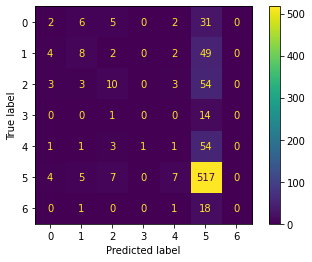

In [ ]:
model_ = Model_CV.model.eval()
X = input_data[2].to(device)
Y = labels[2].to(device)
Y_pred = model_(X).argmax(dim=1)
confusion_matrix(Y.to('cpu'),Y_pred.to('cpu'))

# **50 time model training to check Regularization of hyper parameters by Cross Validation**

In [26]:
X_valid.shape

torch.Size([407, 3, 280, 210])

In [10]:
# K_Folds_test = sk.model_selection.KFold(n_splits=10, shuffle=True)
K_Folds_valid = sk.model_selection.KFold(n_splits=10, shuffle=True)
dat_hour = datetime.now().strftime("%d_%b_%Y_%H_%M")
print_epochs = False

param1 = {
    'Net' : CNN_Nets.Net8_b_binary
    ,'Drop' : 0.2
    ,'LR' : 1.3e-3
    ,'batch_size' : 20
    ,'Momentum' : 0.85
    ,'epochs' : 100
    ,'patience': 20
    ,'weight_decay' :1e-3
    ,'loss_func'  :torch.nn.modules.loss.CrossEntropyLoss
    ,'opt_func' : torch.optim.SGD
}

CV_data = torch.cat([input_data[0],input_data[1]],dim=0)
CV_label = torch.cat([labels[0],labels[1]],dim=0)
X_test = input_data[2]
Y_test = labels[2]


CV_Details = pd.DataFrame(columns=['hyper_param','train_recall_weighed','valid_recall_weighed','test_recall_weighed'
                                  ,'valid_recall_simple','test_recall_simple'
                                  ,'valid_specificity_weighed','test_specificity_weighed'
                                  ,'valid_specificity_simple','test_specificity_simple'])

Max_train_Acc = 0  
Max_valid_Acc = 0 
Max_test_Acc = 0                  

pbar1 = tqdm(range(5))
for i in pbar1:
    pbar2 = tqdm(enumerate(K_Folds_valid.split(CV_data)), total=K_Folds_valid.get_n_splits())
    for fold, (training_index, valid_index) in pbar2:
        X_train = CV_data[training_index]
        Y_train = CV_label[training_index]
        X_valid = CV_data[valid_index]
        Y_valid = CV_label[valid_index]

        label_freq = np.bincount(Y_train)
        labels_weights = 1. / label_freq
        weights = labels_weights[Y_train]
        w_sampler = WeightedRandomSampler(weights, len(weights))

        trainDataset = dset(X_train, Y_train)
        validDataset = dset(X_valid, Y_valid)
        testDataset = dset(X_test, Y_test)

        Model_ = Model_Training_with_loader(**param1,w_sampler = w_sampler , trainDataset = trainDataset, validDataset = validDataset , X_test = X_test, Y_test = Y_test, print_epochs =print_epochs,hyper_params=param1)
        Model_.train()

        model_ = Model_.model.eval().to('cpu')
            
        # Train
        train_recall_weighed = mean(Model_.Epochs_Train_Acc)

        # Valid
        Y_pred = model_(X_valid).argmax(axis=1)
        Y = Y_valid
        valid_recall_weighed, valid_specificity_weighed, _ = recall_specificity_precision(Y,Y_pred,weighted_avg=True)
        valid_recall_simple, valid_specificity_simple, _ = recall_specificity_precision(Y,Y_pred,weighted_avg=False)

        # Test
        Y_pred = model_(X_test).argmax(axis=1)
        Y = Y_test
        test_recall_weighed, test_specificity_weighed, _ = recall_specificity_precision(Y,Y_pred,weighted_avg=True)
        test_recall_simple, test_specificity_simple, _ = recall_specificity_precision(Y,Y_pred,weighted_avg=False)


        if train_recall_weighed > Max_train_Acc: Max_train_Acc = train_recall_weighed
        if valid_recall_weighed > Max_valid_Acc: Max_valid_Acc = valid_recall_weighed
        if test_recall_weighed > Max_test_Acc: Max_test_Acc = test_recall_weighed
        new_row = pd.Series({'train_recall_weighed':train_recall_weighed,'valid_recall_weighed':valid_recall_weighed,'test_recall_weighed':test_recall_weighed
                                      ,'valid_recall_simple':valid_recall_simple,'test_recall_simple':test_recall_simple
                                      ,'valid_specificity_weighed':valid_specificity_weighed,'test_specificity_weighed':test_specificity_weighed
                                      ,'valid_specificity_simple':valid_specificity_simple,'test_specificity_simple':test_specificity_simple}, name='')
        CV_Details = CV_Details.append(new_row)
        pbar1.set_description(f'Max_train_Acc: {Max_train_Acc:.1%}, Max_valid_Acc: {Max_valid_Acc:.1%}, Max_test_Acc: {Max_test_Acc:.1%} ')
        pbar1.set_postfix_str(f'Train_Acc: {train_recall_weighed:.1%} , Valide_Acc: {valid_recall_weighed:.1%} , Test_Acc: {test_recall_weighed:.1%}')


        pickle.dump(CV_Details, open(G_path + '/Saved/Cross_Valid_Results/CV_280_binary_'+ dat_hour,'wb'))

  0%|          | 0/5 [00:00<?, ?it/s]
Max_train_Acc: 82.2%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :   0%|          | 0/5 [08:32<?, ?it/s, Train_Acc: 82.2% , Valide_Acc: 82.8% , Test_Acc: 79.6%]
 10%|█         | 1/10 [08:33<1:16:57, 513.02s/it]

Earlt Stoppo happen at Epoche 90 after no improvment of 21 epochs 


Max_train_Acc: 82.2%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :   0%|          | 0/5 [17:17<?, ?it/s, Train_Acc: 82.1% , Valide_Acc: 79.0% , Test_Acc: 79.1%]
Max_train_Acc: 82.2%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :   0%|          | 0/5 [27:14<?, ?it/s, Train_Acc: 82.2% , Valide_Acc: 80.7% , Test_Acc: 77.1%]
Max_train_Acc: 82.3%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :   0%|          | 0/5 [37:10<?, ?it/s, Train_Acc: 82.3% , Valide_Acc: 80.7% , Test_Acc: 78.6%]
 40%|████      | 4/10 [37:10<57:07, 571.26s/it]  

Earlt Stoppo happen at Epoche 86 after no improvment of 21 epochs 


Max_train_Acc: 82.3%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :   0%|          | 0/5 [45:51<?, ?it/s, Train_Acc: 81.6% , Valide_Acc: 80.9% , Test_Acc: 78.9%]
Max_train_Acc: 82.4%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :   0%|          | 0/5 [56:00<?, ?it/s, Train_Acc: 82.4% , Valide_Acc: 81.8% , Test_Acc: 79.4%]
 60%|██████    | 6/10 [56:00<38:07, 571.95s/it]

Earlt Stoppo happen at Epoche 91 after no improvment of 21 epochs 


Max_train_Acc: 82.4%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :   0%|          | 0/5 [1:05:08<?, ?it/s, Train_Acc: 82.2% , Valide_Acc: 82.5% , Test_Acc: 78.6%]
 70%|███████   | 7/10 [1:05:08<28:12, 564.17s/it]

Earlt Stoppo happen at Epoche 86 after no improvment of 21 epochs 


Max_train_Acc: 82.4%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :   0%|          | 0/5 [1:13:55<?, ?it/s, Train_Acc: 81.6% , Valide_Acc: 80.0% , Test_Acc: 78.1%]
Max_train_Acc: 82.4%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :   0%|          | 0/5 [1:24:03<?, ?it/s, Train_Acc: 82.1% , Valide_Acc: 81.1% , Test_Acc: 75.7%]
 90%|█████████ | 9/10 [1:24:03<09:29, 569.80s/it]

Earlt Stoppo happen at Epoche 59 after no improvment of 21 epochs 


Max_train_Acc: 82.4%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :   0%|          | 0/5 [1:30:04<?, ?it/s, Train_Acc: 79.5% , Valide_Acc: 77.6% , Test_Acc: 72.5%]
100%|██████████| 10/10 [1:30:04<00:00, 540.49s/it]
Max_train_Acc: 82.4%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :  20%|██        | 1/5 [1:30:04<6:00:19, 5404.89s/it, Train_Acc: 79.5% , Valide_Acc: 77.6% , Test_Acc: 72.5%]
Max_train_Acc: 82.4%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :  20%|██        | 1/5 [1:40:12<6:00:19, 5404.89s/it, Train_Acc: 82.3% , Valide_Acc: 81.6% , Test_Acc: 79.4%]
 10%|█         | 1/10 [10:07<1:31:08, 607.63s/it]

Earlt Stoppo happen at Epoche 74 after no improvment of 21 epochs 


Max_train_Acc: 82.4%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :  20%|██        | 1/5 [1:47:43<6:00:19, 5404.89s/it, Train_Acc: 80.3% , Valide_Acc: 76.9% , Test_Acc: 74.7%]
 20%|██        | 2/10 [17:38<1:08:43, 515.50s/it]

Earlt Stoppo happen at Epoche 86 after no improvment of 21 epochs 


Max_train_Acc: 82.4%, Max_valid_Acc: 82.8%, Max_test_Acc: 79.6% :  20%|██        | 1/5 [1:56:26<6:00:19, 5404.89s/it, Train_Acc: 81.7% , Valide_Acc: 80.7% , Test_Acc: 77.6%]
Max_train_Acc: 82.4%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  20%|██        | 1/5 [2:06:36<6:00:19, 5404.89s/it, Train_Acc: 82.4% , Valide_Acc: 83.5% , Test_Acc: 80.1%]
 40%|████      | 4/10 [36:31<55:29, 554.99s/it]  

Earlt Stoppo happen at Epoche 93 after no improvment of 21 epochs 


Max_train_Acc: 82.4%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  20%|██        | 1/5 [2:16:02<6:00:19, 5404.89s/it, Train_Acc: 81.8% , Valide_Acc: 81.4% , Test_Acc: 76.2%]
Max_train_Acc: 82.4%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  20%|██        | 1/5 [2:26:16<6:00:19, 5404.89s/it, Train_Acc: 82.1% , Valide_Acc: 81.1% , Test_Acc: 79.4%]
 60%|██████    | 6/10 [56:11<38:30, 577.54s/it]

Earlt Stoppo happen at Epoche 74 after no improvment of 21 epochs 


Max_train_Acc: 82.4%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  20%|██        | 1/5 [2:33:55<6:00:19, 5404.89s/it, Train_Acc: 81.4% , Valide_Acc: 76.7% , Test_Acc: 78.1%]
 70%|███████   | 7/10 [1:03:50<26:56, 538.75s/it]

Earlt Stoppo happen at Epoche 64 after no improvment of 21 epochs 


Max_train_Acc: 82.4%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  20%|██        | 1/5 [2:40:36<6:00:19, 5404.89s/it, Train_Acc: 80.0% , Valide_Acc: 78.5% , Test_Acc: 78.6%]
 80%|████████  | 8/10 [1:10:31<16:29, 494.91s/it]

Earlt Stoppo happen at Epoche 78 after no improvment of 21 epochs 


Max_train_Acc: 82.4%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  20%|██        | 1/5 [2:48:38<6:00:19, 5404.89s/it, Train_Acc: 80.5% , Valide_Acc: 81.4% , Test_Acc: 76.7%]
Max_train_Acc: 82.4%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  20%|██        | 1/5 [2:58:44<6:00:19, 5404.89s/it, Train_Acc: 82.1% , Valide_Acc: 80.7% , Test_Acc: 79.6%]
100%|██████████| 10/10 [1:28:39<00:00, 531.98s/it]
Max_train_Acc: 82.4%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  40%|████      | 2/5 [2:58:44<4:27:44, 5354.87s/it, Train_Acc: 82.1% , Valide_Acc: 80.7% , Test_Acc: 79.6%]
Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  40%|████      | 2/5 [3:08:50<4:27:44, 5354.87s/it, Train_Acc: 83.3% , Valide_Acc: 80.2% , Test_Acc: 79.1%]
Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  40%|████      | 2/5 [3:19:01<4:27:44, 5354.87s/it, Train_Acc: 82.6% , Valide_Acc: 79.2% , Test_Acc: 77.9%]
 20%|██        | 2/10 [20:16<1:21:10, 608.80s/it]

Earlt Stoppo happen at Epoche 78 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  40%|████      | 2/5 [3:27:06<4:27:44, 5354.87s/it, Train_Acc: 80.6% , Valide_Acc: 79.7% , Test_Acc: 77.1%]
 30%|███       | 3/10 [28:22<1:04:27, 552.48s/it]

Earlt Stoppo happen at Epoche 89 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  40%|████      | 2/5 [3:36:27<4:27:44, 5354.87s/it, Train_Acc: 81.4% , Valide_Acc: 81.8% , Test_Acc: 78.6%]
 40%|████      | 4/10 [37:43<55:34, 555.78s/it]  

Earlt Stoppo happen at Epoche 65 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  40%|████      | 2/5 [3:43:18<4:27:44, 5354.87s/it, Train_Acc: 79.9% , Valide_Acc: 78.8% , Test_Acc: 74.9%]
 50%|█████     | 5/10 [44:33<41:56, 503.35s/it]

Earlt Stoppo happen at Epoche 85 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  40%|████      | 2/5 [3:52:09<4:27:44, 5354.87s/it, Train_Acc: 81.2% , Valide_Acc: 82.8% , Test_Acc: 77.6%]
 60%|██████    | 6/10 [53:25<34:11, 512.96s/it]

Earlt Stoppo happen at Epoche 89 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  40%|████      | 2/5 [4:01:38<4:27:44, 5354.87s/it, Train_Acc: 81.6% , Valide_Acc: 76.2% , Test_Acc: 78.4%]
 70%|███████   | 7/10 [1:02:53<26:33, 531.21s/it]

Earlt Stoppo happen at Epoche 65 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  40%|████      | 2/5 [4:08:33<4:27:44, 5354.87s/it, Train_Acc: 79.7% , Valide_Acc: 79.2% , Test_Acc: 75.2%]
Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  40%|████      | 2/5 [4:19:06<4:27:44, 5354.87s/it, Train_Acc: 83.0% , Valide_Acc: 82.1% , Test_Acc: 77.9%]
 90%|█████████ | 9/10 [1:20:21<08:57, 537.47s/it]

Earlt Stoppo happen at Epoche 94 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  40%|████      | 2/5 [4:29:01<4:27:44, 5354.87s/it, Train_Acc: 82.3% , Valide_Acc: 81.1% , Test_Acc: 78.9%]
100%|██████████| 10/10 [1:30:16<00:00, 541.67s/it]
Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  60%|██████    | 3/5 [4:29:01<2:59:26, 5383.12s/it, Train_Acc: 82.3% , Valide_Acc: 81.1% , Test_Acc: 78.9%]
  0%|          | 0/10 [00:00<?, ?it/s]

Earlt Stoppo happen at Epoche 79 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  60%|██████    | 3/5 [4:37:23<2:59:26, 5383.12s/it, Train_Acc: 81.6% , Valide_Acc: 81.8% , Test_Acc: 78.6%]
 10%|█         | 1/10 [08:21<1:15:16, 501.83s/it]

Earlt Stoppo happen at Epoche 91 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  60%|██████    | 3/5 [4:47:05<2:59:26, 5383.12s/it, Train_Acc: 81.7% , Valide_Acc: 82.5% , Test_Acc: 76.9%]
 20%|██        | 2/10 [18:04<1:13:13, 549.16s/it]

Earlt Stoppo happen at Epoche 75 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  60%|██████    | 3/5 [4:55:14<2:59:26, 5383.12s/it, Train_Acc: 80.9% , Valide_Acc: 79.7% , Test_Acc: 79.4%]
 30%|███       | 3/10 [26:13<1:00:52, 521.79s/it]

Earlt Stoppo happen at Epoche 100 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  60%|██████    | 3/5 [5:06:02<2:59:26, 5383.12s/it, Train_Acc: 82.7% , Valide_Acc: 78.3% , Test_Acc: 76.7%]
 40%|████      | 4/10 [37:00<57:08, 571.46s/it]  

Earlt Stoppo happen at Epoche 81 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 83.5%, Max_test_Acc: 80.1% :  60%|██████    | 3/5 [5:14:45<2:59:26, 5383.12s/it, Train_Acc: 81.0% , Valide_Acc: 82.1% , Test_Acc: 77.9%]
Max_train_Acc: 83.3%, Max_valid_Acc: 84.9%, Max_test_Acc: 80.1% :  60%|██████    | 3/5 [5:25:33<2:59:26, 5383.12s/it, Train_Acc: 82.0% , Valide_Acc: 84.9% , Test_Acc: 79.1%]
 60%|██████    | 6/10 [56:31<39:03, 585.87s/it]

Earlt Stoppo happen at Epoche 88 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 84.9%, Max_test_Acc: 80.1% :  60%|██████    | 3/5 [5:35:04<2:59:26, 5383.12s/it, Train_Acc: 81.7% , Valide_Acc: 80.2% , Test_Acc: 79.9%]
 70%|███████   | 7/10 [1:06:02<29:03, 581.07s/it]

Earlt Stoppo happen at Epoche 37 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 84.9%, Max_test_Acc: 80.1% :  60%|██████    | 3/5 [5:39:09<2:59:26, 5383.12s/it, Train_Acc: 77.7% , Valide_Acc: 74.8% , Test_Acc: 73.5%]
 80%|████████  | 8/10 [1:10:08<15:48, 474.19s/it]

Earlt Stoppo happen at Epoche 84 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 84.9%, Max_test_Acc: 80.1% :  60%|██████    | 3/5 [5:48:22<2:59:26, 5383.12s/it, Train_Acc: 81.4% , Valide_Acc: 78.5% , Test_Acc: 76.7%]
Max_train_Acc: 83.3%, Max_valid_Acc: 85.4%, Max_test_Acc: 81.8% :  60%|██████    | 3/5 [5:59:23<2:59:26, 5383.12s/it, Train_Acc: 82.2% , Valide_Acc: 85.4% , Test_Acc: 81.8%]
100%|██████████| 10/10 [1:30:22<00:00, 542.20s/it]
Max_train_Acc: 83.3%, Max_valid_Acc: 85.4%, Max_test_Acc: 81.8% :  80%|████████  | 4/5 [5:59:23<1:29:58, 5398.49s/it, Train_Acc: 82.2% , Valide_Acc: 85.4% , Test_Acc: 81.8%]
  0%|          | 0/10 [00:00<?, ?it/s]

Earlt Stoppo happen at Epoche 100 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 85.4%, Max_test_Acc: 81.8% :  80%|████████  | 4/5 [6:10:26<1:29:58, 5398.49s/it, Train_Acc: 82.9% , Valide_Acc: 78.8% , Test_Acc: 78.1%]
 10%|█         | 1/10 [11:03<1:39:28, 663.21s/it]

Earlt Stoppo happen at Epoche 92 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 85.4%, Max_test_Acc: 81.8% :  80%|████████  | 4/5 [6:20:30<1:29:58, 5398.49s/it, Train_Acc: 81.6% , Valide_Acc: 83.5% , Test_Acc: 79.1%]
 20%|██        | 2/10 [21:07<1:23:47, 628.47s/it]

Earlt Stoppo happen at Epoche 62 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 85.4%, Max_test_Acc: 81.8% :  80%|████████  | 4/5 [6:27:21<1:29:58, 5398.49s/it, Train_Acc: 79.6% , Valide_Acc: 77.8% , Test_Acc: 75.4%]
 30%|███       | 3/10 [27:57<1:01:41, 528.76s/it]

Earlt Stoppo happen at Epoche 61 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 85.4%, Max_test_Acc: 81.8% :  80%|████████  | 4/5 [6:34:05<1:29:58, 5398.49s/it, Train_Acc: 80.1% , Valide_Acc: 77.4% , Test_Acc: 73.7%]
 40%|████      | 4/10 [34:41<47:58, 479.70s/it]  

Earlt Stoppo happen at Epoche 45 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 85.4%, Max_test_Acc: 81.8% :  80%|████████  | 4/5 [6:39:07<1:29:58, 5398.49s/it, Train_Acc: 78.3% , Valide_Acc: 77.1% , Test_Acc: 75.2%]
 50%|█████     | 5/10 [39:44<34:38, 415.67s/it]

Earlt Stoppo happen at Epoche 92 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 85.4%, Max_test_Acc: 81.8% :  80%|████████  | 4/5 [6:49:09<1:29:58, 5398.49s/it, Train_Acc: 81.8% , Valide_Acc: 80.4% , Test_Acc: 78.1%]
Max_train_Acc: 83.3%, Max_valid_Acc: 85.4%, Max_test_Acc: 81.8% :  80%|████████  | 4/5 [7:00:04<1:29:58, 5398.49s/it, Train_Acc: 82.9% , Valide_Acc: 76.4% , Test_Acc: 77.1%]
 70%|███████   | 7/10 [1:00:40<26:49, 536.46s/it]

Earlt Stoppo happen at Epoche 79 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 85.4%, Max_test_Acc: 81.8% :  80%|████████  | 4/5 [7:08:42<1:29:58, 5398.49s/it, Train_Acc: 81.3% , Valide_Acc: 76.7% , Test_Acc: 77.1%]
Max_train_Acc: 83.3%, Max_valid_Acc: 85.4%, Max_test_Acc: 81.8% :  80%|████████  | 4/5 [7:19:41<1:29:58, 5398.49s/it, Train_Acc: 82.0% , Valide_Acc: 82.5% , Test_Acc: 78.4%]
 90%|█████████ | 9/10 [1:20:17<09:30, 570.68s/it]

Earlt Stoppo happen at Epoche 99 after no improvment of 21 epochs 


Max_train_Acc: 83.3%, Max_valid_Acc: 85.4%, Max_test_Acc: 81.8% :  80%|████████  | 4/5 [7:30:44<1:29:58, 5398.49s/it, Train_Acc: 82.6% , Valide_Acc: 80.0% , Test_Acc: 80.3%]
100%|██████████| 10/10 [1:31:20<00:00, 548.09s/it]
Max_train_Acc: 83.3%, Max_valid_Acc: 85.4%, Max_test_Acc: 81.8% : 100%|██████████| 5/5 [7:30:44<00:00, 5408.89s/it, Train_Acc: 82.6% , Valide_Acc: 80.0% , Test_Acc: 80.3%]


In [ ]:
import time
import tqdm

for outer in tqdm.tqdm_notebook(range(5), ncols = 1000, desc = "First CV", position = 0, leave=True):
    for inner in tqdm.tqdm_notebook(range(3), ncols = 1000, desc = "Second CV", position = 1, leave=True):
        time.sleep(0.5)
print("done!")

First CV:   0%|                                                                                               …

Second CV:   0%|                                                                                              …

Second CV:   0%|                                                                                              …

Second CV:   0%|                                                                                              …

Second CV:   0%|                                                                                              …

Second CV:   0%|                                                                                              …

done!


In [11]:
CV_Details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries,  to 
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hyper_param                0 non-null      float64
 1   train_recall_weighed       50 non-null     float64
 2   valid_recall_weighed       50 non-null     float64
 3   test_recall_weighed        50 non-null     float64
 4   valid_recall_simple        50 non-null     float64
 5   test_recall_simple         50 non-null     float64
 6   valid_specificity_weighed  50 non-null     float64
 7   test_specificity_weighed   50 non-null     float64
 8   valid_specificity_simple   50 non-null     float64
 9   test_specificity_simple    50 non-null     float64
dtypes: float64(10)
memory usage: 6.4+ KB


In [12]:
col_recall = ['test_recall_weighed','valid_recall_weighed']
model_recalls = CV_Details[col_recall]
col_specificity = ['test_specificity_weighed','valid_specificity_weighed']
model_specificity = CV_Details[col_specificity]

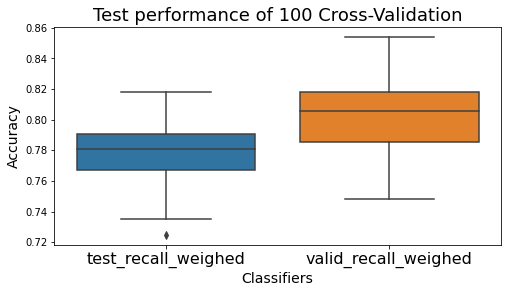

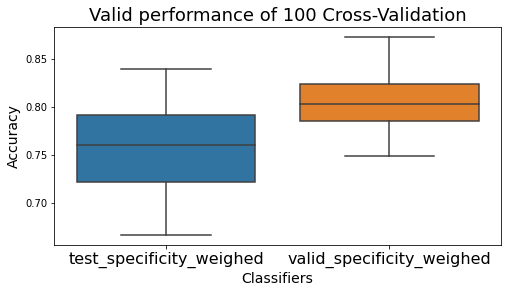

In [13]:
plt.subplots(figsize=(8,4))
sns.boxplot(data=model_recalls)
plt.title('Test performance of 100 Cross-Validation',fontsize = 18)
plt.xlabel("Classifiers", fontsize = 14)
plt.ylabel("Accuracy", fontsize = 14)
plt.xticks(fontsize=16, rotation=0)
plt.show()

plt.subplots(figsize=(8,4))
sns.boxplot(data=model_specificity)
plt.title('Valid performance of 100 Cross-Validation',fontsize = 18)
plt.xlabel("Classifiers", fontsize = 14)
plt.ylabel("Accuracy", fontsize = 14)
plt.xticks(fontsize=16, rotation=0)
plt.show()


# **Save the model**

In [ ]:
dat_hour = datetime.now().strftime("%d_%b_%Y_%H_%M")
pickle.dump(Model_Best_Grid.model.eval().to('cpu'), open(G_path +'/Saved/Models/CNN_280x210/' + 'CNN_280x210_'+dat_hour, 'wb'))
# pickle.dump(Model_CV, open(G_path + '/Saved/CNN_60x45_Best_CV_'+dat_hour, 'wb'))

# **Save Grid search-Cross Validation Details**

In [ ]:
pickle.dump([CNN_Nets, Model_Training], open(G_save + 'CNNs_Network_Training', "wb"))

In [ ]:
dat_hour = datetime.now().strftime("%d_%b_%Y_%H:%M")
pickle.dump(Grid_Details, open(G_save + 'Grid_Details_'+dat_hour, 'wb'))
pickle.dump(CNN_CV_Details, open(G_save + 'CNN_CV_Details_'+dat_hour, 'wb'))

Grid_Details.to_csv(G_save + 'Grid_Details_'+dat_hour +'.csv')
CNN_CV_Details.to_csv(G_save + 'CNN_CV_Details_'+dat_hour+ '.csv')